BETACOOL----------release ver.7.2.beta (omp)----------2024/12/20
../../../betacool/Betacool ../../LEIR.bld /f
Input parameter [12,11] was initialised with default value:1e+10
Cannot open file : Bring3.bump
Mean beam radius= 0.1370049566  is more than chamber 4
Mean beam radius= 0.1370049566  is more than chamber 4
FINISH: 2024/12/20-9:46:35

TODO: simple version here...
BETACOOL----------release ver.7.2.beta (omp)----------2024/12/20
../../../betacool/Betacool ../../LEIR.bld /f
Input parameter [12,11] was initialised with default value:1e+10
Cannot open file : Bring3.bump
Mean beam radius= 0.1370049566  is more than chamber 4
Mean beam radius= 0.1370049566  is more than chamber 4
FINISH: 2024/12/20-9:46:35

TODO: simple version here...
BETACOOL----------release ver.7.2.beta (omp)----------2024/12/20
../../../betacool/Betacool ../../LEIR.bld /f
Input parameter [12,11] was initialised with default value:1e+10
Cannot open file : Bring3.bump
Mean beam radius= 0.1370049566  is more than cha

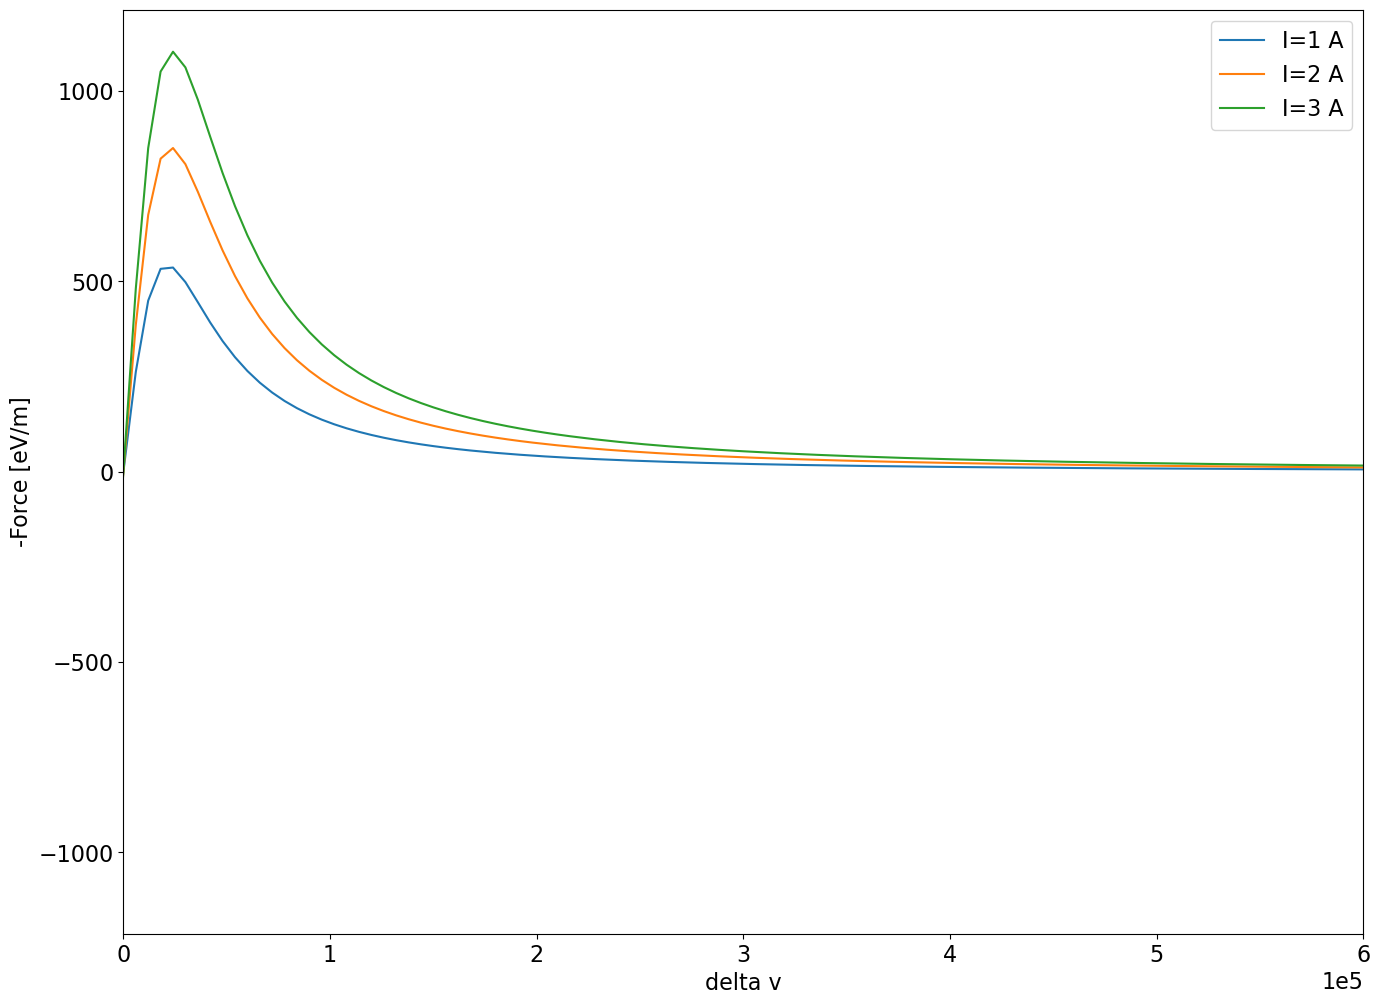

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pybetacool import PyBetaCool

current_list = [1,2,3] # A

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(16, 12))

for i,current in enumerate(current_list):
    
    BLDfilename = '../../LEIR.bld'
    betacoolExec = '../../../betacool/Betacool'
    obj = PyBetaCool(BLDfilename=BLDfilename, betacoolExec=betacoolExec)
    # Edit one parameter (row=50, 4th value is "magnetic field")
    obj.BLDContent[55][2] = current 
    # Overwrites LEIR.bld with new setting 
    obj.BLDContent.save(BLDfilename)
    # Execute Betacool
    obj.runBetacool('/f')
    data = obj.parseCurveFile('flong.cur')

    v_diff=data[:, 0]
    force=data[:, 1]
    
    filpath=f'results/force_betacool_I={current}.npz'

    plt.plot(data[:, 0],-data[:, 1], label=f'I={current} A')

    plt.xlabel('delta v')
    plt.ylabel('-Force [eV/m]')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.legend()
    plt.xlim([0,6e5])
    
    
    np.savez(filpath,v_diff=v_diff, force=force)

    #reset the bld file back to default 
    obj.BLDContent[55][2] = 0.6
    # Overwrites LEIR.bld with new setting 
    obj.BLDContent.save(BLDfilename)

plt.show()